In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [2]:
NUM_WORDS = 5000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


In [3]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


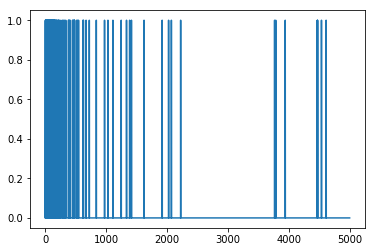

In [4]:

%matplotlib inline
plt.plot(train_data[0])

In [8]:
#baseline model과 Small, Bigger Model과 비교

baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                80016     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4861 - acc: 0.7851 - binary_crossentropy: 0.4861 - val_loss: 0.3292 - val_acc: 0.8742 - val_binary_crossentropy: 0.3292
Epoch 2/20
 - 3s - loss: 0.2622 - acc: 0.9018 - binary_crossentropy: 0.2622 - val_loss: 0.2893 - val_acc: 0.8829 - val_binary_crossentropy: 0.2893
Epoch 3/20
 - 3s - loss: 0.2123 - acc: 0.9205 - binary_cro

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

smaller_model.summary()

smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 20004     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 20,029
Trainable params: 20,029
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6418 - acc: 0.6973 - binary_crossentropy: 0.6418 - val_loss: 0.5869 - val_acc: 0.7720 - val_binary_crossentropy: 0.5869
Epoch 2/20
 - 3s - loss: 0.5374 - acc: 0.8128 - binary_crossentropy: 0.5374 - val_loss: 0.5206 - val_acc: 0.8121 - val_binary_crossentropy: 0.5206
Epoch 3/20
 - 3s - loss: 0.4803 - acc: 0.8643 - binary_cro

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

bigger_history = bigger_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               2560512   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 2,823,681
Trainable params: 2,823,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 15s - loss: 0.3560 - acc: 0.8432 - binary_crossentropy: 0.3560 - val_loss: 0.3025 - val_acc: 0.8743 - val_binary_crossentropy: 0.3025
Epoch 2/20
 - 17s - loss: 0.1760 - acc: 0.9340 - binary_crossentropy: 0.1760 - val_loss: 0.3357 - val_acc: 0.8660 - val_binary_crossentropy: 0.3357
Epoch 3/20
 - 18s - loss: 0.0777 - acc: 0.9756 - b

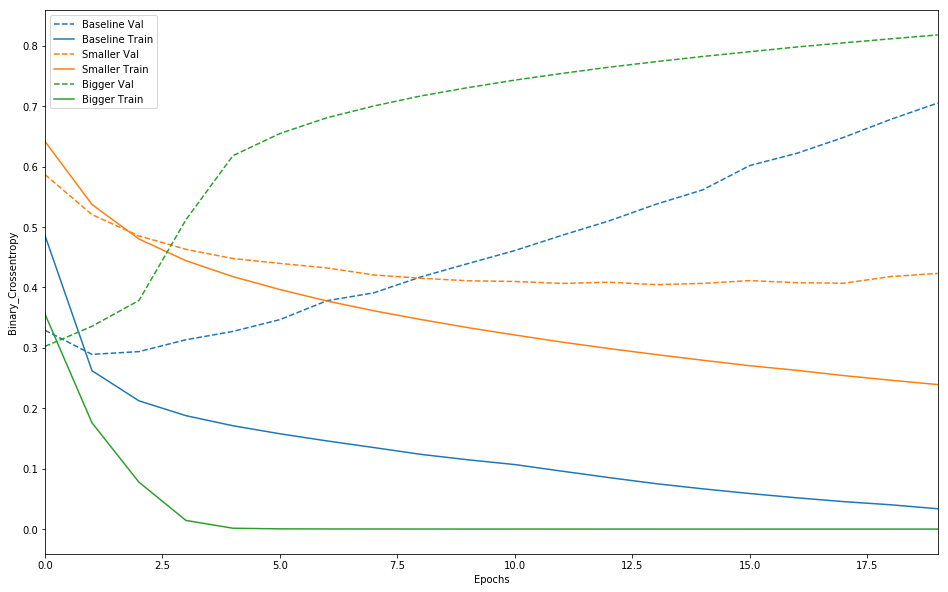

In [13]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('-',' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])



In [18]:
# Add L2 Regularization(=weight decay)

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

le_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5564 - acc: 0.7805 - binary_crossentropy: 0.5151 - val_loss: 0.4007 - val_acc: 0.8655 - val_binary_crossentropy: 0.3606
Epoch 2/20
 - 3s - loss: 0.3282 - acc: 0.8932 - binary_crossentropy: 0.2851 - val_loss: 0.3366 - val_acc: 0.8832 - val_binary_crossentropy: 0.2913
Epoch 3/20
 - 5s - loss: 0.2784 - acc: 0.9133 - binary_crossentropy: 0.2317 - val_loss: 0.3325 - val_acc: 0.8840 - val_binary_crossentropy: 0.2848
Epoch 4/20
 - 5s - loss: 0.2566 - acc: 0.9232 - binary_crossentropy: 0.2082 - val_loss: 0.3396 - val_acc: 0.8828 - val_binary_crossentropy: 0.2909
Epoch 5/20
 - 4s - loss: 0.2468 - acc: 0.9267 - binary_crossentropy: 0.1974 - val_loss: 0.3514 - val_acc: 0.8765 - val_binary_crossentropy: 0.3019
Epoch 6/20
 - 4s - loss: 0.2366 - acc: 0.9302 - binary_crossentropy: 0.1867 - val_loss: 0.3565 - val_acc: 0.8773 - val_binary_crossentropy: 0.3069
Epoch 7/20
 - 4s - loss: 0.2321 - acc: 0.9317 - binary_crossentropy: